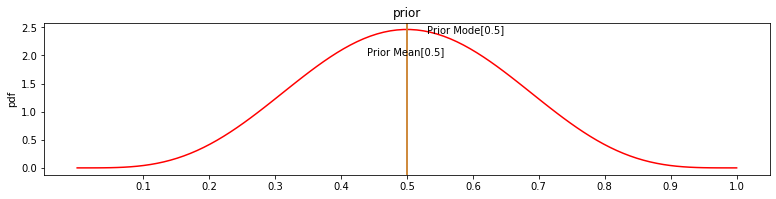

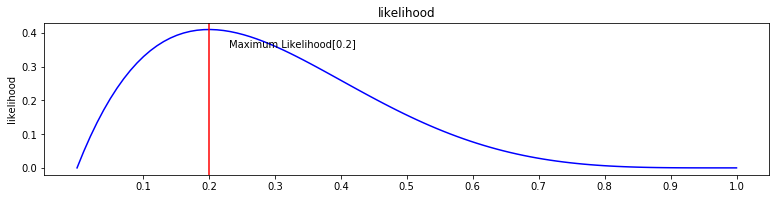

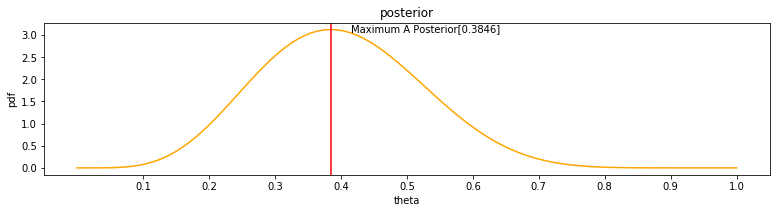

In [39]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.stats import binom
from pylab import rcParams

rcParams['figure.figsize'] = 13, 2.8

n_data = 5
x_data = 1

beta_prior_a = 5
beta_prior_b = 5

theta_ticks = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
theta = np.linspace(0, 1, 100)

beta_prior_mean = round((beta_prior_a)/(beta_prior_a+beta_prior_b), 4)
beta_prior_mean_y_value = ss.beta.pdf(beta_prior_mean, beta_prior_a, beta_prior_b)
beta_prior_mode = round((beta_prior_a-1)/(beta_prior_a+beta_prior_b-2), 4)
beta_prior_mode_y_value = ss.beta.pdf(beta_prior_mode, beta_prior_a, beta_prior_b)
beta_prior_y = ss.beta.pdf(theta, beta_prior_a, beta_prior_b)
plt.plot(theta, beta_prior_y, ls='-', color='red')
plt.axvline(x=beta_prior_mode, color = 'blue')
plt.axvline(x=beta_prior_mean, color = 'orange')
plt.xticks(theta_ticks)
plt.title('prior')
plt.ylabel('pdf')
plt.text(beta_prior_mode+0.03, beta_prior_mode_y_value-0.05, "Prior Mode["+str(beta_prior_mode)+"]")
plt.text(beta_prior_mean-0.06, beta_prior_mode_y_value-0.45, "Prior Mean["+str(beta_prior_mean)+"]")
plt.show()

likelihood_y = ss.binom.pmf(x_data, n_data, theta)
likelihood_mle = round(x_data/n_data, 4)
likelihood_mle_y_value = ss.binom.pmf(x_data, n_data, likelihood_mle)
plt.plot(theta, likelihood_y, ls='-', color='blue')
plt.axvline(x=likelihood_mle, color = 'red')
plt.title('likelihood')
plt.ylabel('likelihood')
plt.xticks(theta_ticks)
plt.text(likelihood_mle+0.03, likelihood_mle_y_value-0.05, "Maximum Likelihood["+str(likelihood_mle)+"]")
plt.show()

beta_posterior_map = (x_data+beta_prior_a-1)/(n_data+beta_prior_a+beta_prior_b-2)
beta_posterior_map_y_value = ss.beta.pdf(beta_posterior_map, beta_prior_a+x_data, beta_prior_b+n_data-x_data)
beta_posterior_y = ss.beta.pdf(theta, beta_prior_a+x_data, beta_prior_b+n_data-x_data)
plt.plot(theta, beta_posterior_y, ls='-', color='orange')
plt.axvline(x=beta_posterior_map, color = 'red')
plt.title('posterior')
plt.ylabel('pdf')
plt.xlabel('theta')
plt.xticks(theta_ticks)
plt.text(beta_posterior_map+0.03, beta_posterior_map_y_value-0.05, "Maximum A Posterior["+str(round(beta_posterior_map, 4))+"]")
plt.show()
